# Ian Rabago - PHYS 404 , HW 7

## Lax-Wendroff Algorithm for Burger's Equation

<h2> $ \frac{\partial u}{\partial t} + \epsilon \frac{\partial (u^2/2)}{\partial x} = 0 $ </h2>

<h3> $ u_{i,j+1} = u_{i,j} - \frac{\beta}{4}(u_{i+1,j}^2-u_{i-1,j}^2) + \frac{\beta^2}{8}\big[(u_{i+1,j}+u_{i,j})(u_{i+1,j}^2-u_{i,j}^2) - (u_{i,j}+u_{i-1,j})(u_{i,j}^2-u_{i-1,j}^2)\big] $ <h3>

<h3> $ c=\epsilon u , \beta = \frac{\epsilon}{\Delta x / \Delta t} $ </h3>

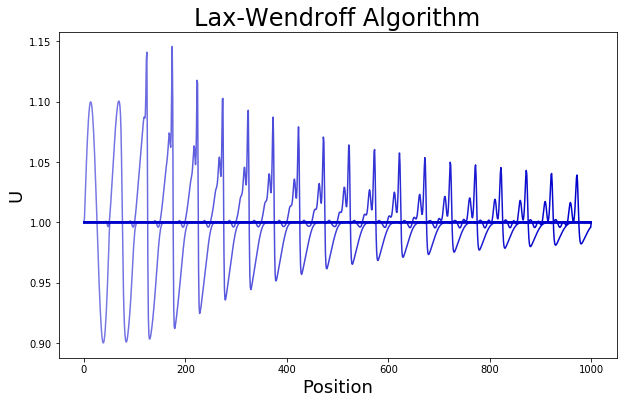

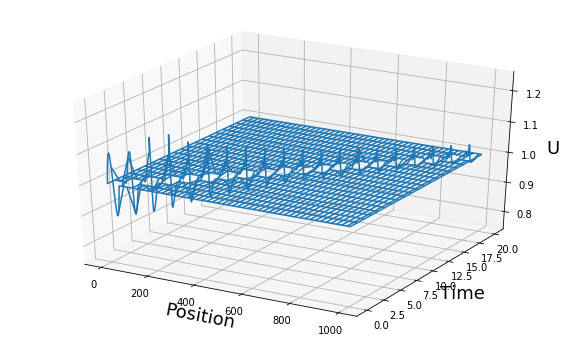

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 200     #Length
Nx = 1001   #Number of x gridpoints
tf = 200     #Final time of the simulation.
v = 1       #Velocity of the wave.
plot_dt = 10  #dt for plotting

dx = L/(Nx-1)                          # Minimum x step.
dt = 0.75*dx/v                         # Minimum v step.
U = np.zeros((Nx, 2))                  # U[x,t] - Matrix for current and next steps of the wave.
                                        # Does not save all values, in order to save memory.
Up = np.zeros((Nx, int(tf/plot_dt)+1))   # Saves select data for plotting.
fig = plt.figure(figsize=(10,6))          #Initial 2D figure.

# Set the initial conditions of the wave.
# Creates a step-function as the initial wave, with the right side being higher.
'''
for i in range(Nx):
    if i < int((Nx-1)/2):
        U[i,0] = 0.0
        U[i,1] = 0.0
    else:
        U[i,0] = 1.0
        U[i,1] = 1.0
'''        
for i in range(Nx):
    if  dx*i/10.<1:
        U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
        U[i,1]=U[i,0]
    else:
        U[i,0]=1.0
        U[i,1]=U[i,0]
    
t = 0.0     #Current time
plot_n = 0   #Time for plotting

#Integrates in steps of dt from t = 0 to t = tf.
while t < tf:
    #Uses the Lax-Wendroff method to update each point
    for i in range(1, Nx-1):
        beta = 0
        if U[i,0] != 0:
            beta = 1/(dx/dt)    #Calculates beta, with epsilon = 1.
            

        U[i,1] = U[i,0] - (beta/4)*(U[i+1,0]**2-U[i-1,0]**2) + (0.125*beta**2)*( (U[i+1,0]+U[i,0])*(U[i+1,0]**2-U[i,0]**2) - (U[i,0]+U[i-1,0])*(U[i,0]**2-U[i-1,0]**2) )
    
    #For each multiple of dt, save the solution into Up and plot the result on a 2D grid.
    if t >= plot_n*plot_dt:

        plt.plot(U[:,1], color=(0, 0, 0.8, 0.5+0.025*(plot_n+1)) )    #Colors the plots blue, with earlier plots being more transparent.
        Up[:,plot_n] = U[:,1]
        plot_n += 1
    
    #Once updated, sets the new solution U[i,1] s the current solution U[i,0] for the next iteration.
    #Although this could be written into the for loop above, it may have to be changed if higher-order derivatives are used.
    for i in range(1, Nx-1):
        U[i,0] = U[i,1]
    
    t+=dt

#Fixes the last row, for plotting purposes.
for i in range(Nx):
    Up[i, -1] = 1

    
#2D graph setup.
plt.xlabel("Position", fontsize=18)
plt.ylabel("U", fontsize=18)
plt.title("Lax-Wendroff Algorithm", fontsize=24)
plt.show()


#3D graph setup.
x = list(range(Nx))
y = list(range( int(tf/plot_dt)+1 ))
X, Y = np.meshgrid(x,y)

Z = Up[X,Y]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel("Position", fontsize=18)
ax.set_ylabel("Time", fontsize=18)
ax.set_zlabel("U", fontsize=18)
ax.set_zlim(0.75, 1.25)
plt.show()

<p> As shown above, the Lax-Wendroff algorithm produces shock waves similar to the upwind algorithm. </p>

<p> Since $\beta = \frac{dt}{dx}$, the stability of the Lax-Wendroff algorithm revolves around the sizes of dt and dx. </p>

<p> Changing the size of the timestep $dt = dx/v$ alters the appearance of the waves. Lower timesteps result in larger numerical errors, which appear as ripples at the shock front. </p>

<p> However, if $dt \geq 1$, then $\beta \geq 1$, so the solution becomes unstable unless $dx$ or $v$ are changed. </p>

### Comparison with Upwind Method

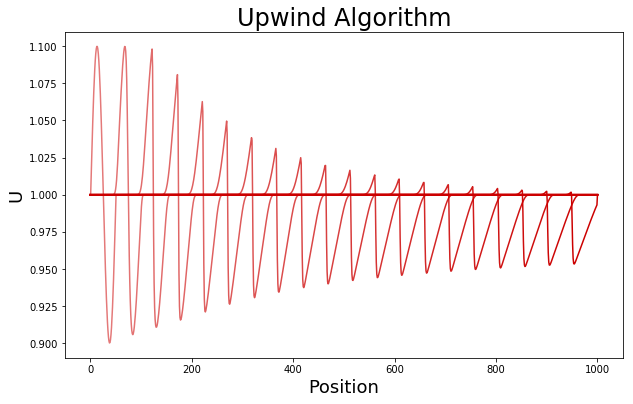

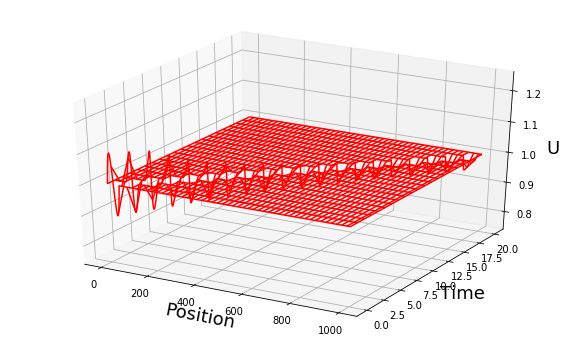

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 200     #Length
Nx = 1001   #Number of x gridpoints
tf = 200     #Final time of the simulation.
v = 1       #Velocity of the wave.
plot_dt = 10  #dt for plotting

dx = L/(Nx-1)                          # Minimum x step.
dt = 0.75*dx/v                         # Minimum v step.
U = np.zeros((Nx, 2))                  # U[x,t] - Matrix for current and next steps of the wave.
                                        # Does not save all values, in order to save memory.
Up = np.zeros((Nx, int(tf/plot_dt)+1))   # Saves select data for plotting.
fig = plt.figure(figsize=(10,6))          #Initial 2D figure.

# Set the initial conditions of the wave.
# Creates a step-function as the initial wave, with the right side being higher.
'''
for i in range(Nx):
    if i < int((Nx-1)/2):
        U[i,0] = 0.0
        U[i,1] = 0.0
    else:
        U[i,0] = 1.0
        U[i,1] = 1.0
'''        
for i in range(Nx):
    if  dx*i/10.<1:
        U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
        U[i,1]=U[i,0]
    else:
        U[i,0]=1.0
        U[i,1]=U[i,0]
    
t = 0.0     #Current time
plot_n = 0   #Time for plotting

#Integrates in steps of dt from t = 0 to t = tf.
while t < tf:
    #Uses the Upwind method to update each point
    dt=min(dx/abs((U[:,0]+1.e-10)))
    for i in range(1, Nx-1):
        if U[i,0]>0:
            U[i, 1] = U[i,0] - (dt/dx)*U[i,0]*(U[i,0]-U[i-1,0])   
        else:
            U[i, 1] = U[i,0] - (dt/dx)*U[i,0]*(U[i+1,0]-U[i,0])  
            
    #For each multiple of dt, save the solution into Up and plot the result on a 2D grid.
    if t >= plot_n*plot_dt:
        plt.plot(U[:,1], color=(0.8, 0, 0, 0.5+0.025*(plot_n+1)))    #Colors the plot red, with earlier plots being slightly transparent
        Up[:,plot_n] = U[:,1]
        plot_n += 1
    
    #Once updated, sets the new solution U[i,1] s the current solution U[i,0] for the next iteration.
    #Although this could be written into the for loop above, it may have to be changed if higher-order derivatives are used.
    for i in range(1, Nx-1):
        U[i,0] = U[i,1]
    
    t+=dt

#Fixes the last row, for plotting purposes.
for i in range(Nx):
    Up[i, -1] = 1

    
#2D graph setup.
plt.xlabel("Position", fontsize=18)
plt.ylabel("U", fontsize=18)
plt.title("Upwind Algorithm", fontsize=24)
plt.show()


#3D graph setup.
x = list(range(Nx))
y = list(range( int(tf/plot_dt)+1 ))
X, Y = np.meshgrid(x,y)

Z = Up[X,Y]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_xlabel("Position", fontsize=18)
ax.set_ylabel("Time", fontsize=18)
ax.set_zlabel("U", fontsize=18)
ax.set_zlim(0.75, 1.25)
plt.show()




<p> The Lax-Wendroff and Upwind methods both develop vertical shocks from sinusoidal waves. However, the Lax-Wendroff method appears to have a more symmetric decrease in amplitude over time; although both methods produce waves which decrease in amplitude, the wave produced by the upwind method shrinks on the upwards edge faster than the downwards edge. </p>

<p> Examining the 2D graph of the Lax-Wendroff method shows small ripples growing behind the main wave. This is a feature not present in the Upwind method. Overall, the Lax-Wendroff method seems better, despite the numerical artifacts.</p>